# Linear Regression with TensorFlow low-level API

In [1]:
from __future__ import print_function, division

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from IPython.display import display

In [2]:
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


### features are all different scales -> use StandardScalar

In [3]:
# the DataFrame.describe() method is very useful!
pd.DataFrame(boston.data).describe()

# shifts and scales data so that Mean = 0 and Stddev = 1
data_scaled = StandardScaler().fit_transform(boston.data)

# Linear Regression with Batch Gradient Descent

$$\large{\hat{y}_i = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n }$$

* $\hat{y}_i$ is the i-th predicted target value
* $n$ is the number of features
* $x_i$ is the i-th feature value (we'll add an $x_0 = 1$ term to every sample so we can represent this as a single dot product)
* $w_i$ is the i-th paramter value, $w_0$ is the bias term

### Vectorized form

$$\large{\hat{y}_i = \vec{x}_i \cdot \vec{w} }$$

### Loss Function: Mean Squared Error (MSE)

$$\large{\text{MSE}(\mathbf{X},\vec{w}) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 }$$

In [4]:
n_samples, n_features = data_scaled.shape
print('{0} samples; {1} features'.format(n_samples, n_features))

# add a bias column of 1's
data_scaled_bias = np.concatenate((np.ones([n_samples,1]), 
                                   data_scaled), axis=1)

learn_rate = 0.05

506 samples; 13 features


In [5]:
# tf.constant - source op that outputs a constant value
X = tf.constant(data_scaled_bias, name='data', dtype=tf.float32)
y = tf.constant(np.expand_dims(boston.target, axis=1), 
                name='target', dtype=tf.float32)
# tf.Variable - holds our weights + biases. Randomly initialized
# Updated on every gradient step using the assign op
w = tf.Variable(tf.random_uniform([n_features + 1, 1], -1.0,1.0), 
                name='weights', dtype=tf.float32)
y_pred = tf.matmul(X, w)

# MSE Loss function
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='loss')

# manually computing gradients - hardcoded for our particular loss function
mse_grads = 2/n_samples * tf.matmul(tf.transpose(X), error)

# update our weights vector using an assign op
train_op = tf.assign(w, w - learn_rate * mse_grads)

init = tf.global_variables_initializer()

# Start a Graph Session and run our training operation

In [6]:
n_epoch = 100
train_loss = []

with tf.Session() as sess:
    init.run()
    for ep in range(n_epoch):
        sess.run(train_op)
        # print out the loss every 10 epochs
        if (ep % 10 == 0):
            print('ep {0}; mse={1}'.format(ep, mse.eval()))
        train_loss.append(mse.eval())

ep 0; mse=479.790924072
ep 10; mse=78.9160690308
ep 20; mse=30.3880634308
ep 30; mse=24.075170517
ep 40; mse=23.0286197662
ep 50; mse=22.7060890198
ep 60; mse=22.5251426697
ep 70; mse=22.3977909088
ep 80; mse=22.3025341034
ep 90; mse=22.2295455933


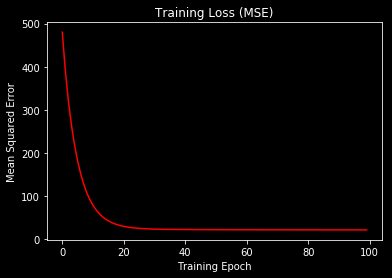

In [7]:
plt.style.use('dark_background')
plt.plot(range(n_epoch), train_loss, 'r')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss (MSE)')
plt.show()